In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')


##### The tech stocks we'll use for this analysis

In [63]:
path='F:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [64]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [65]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [66]:
all_data['date']=pd.to_datetime(all_data['date'])

In [70]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [59]:
all_data.set_index('date',inplace=True)

In [48]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
##### historical view of the closing price of all the stocks

In [53]:
tech_list = all_data['Name'].unique()

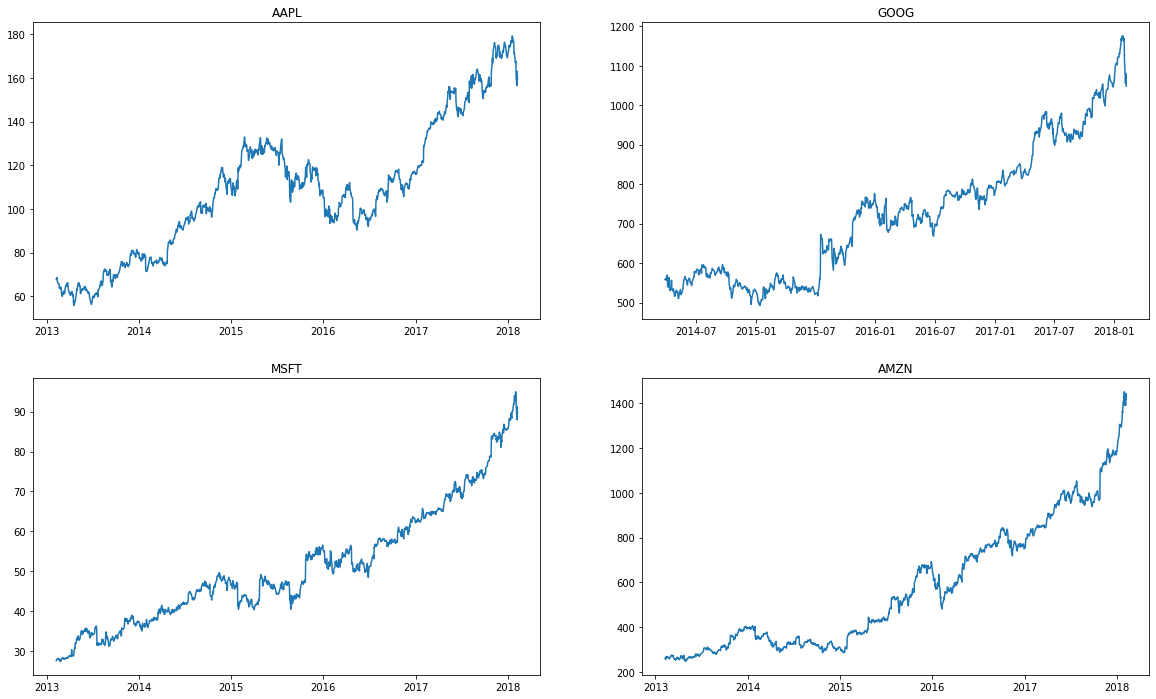

In [74]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

    

##### let's analyse the total volume of stock being traded each day

In [129]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


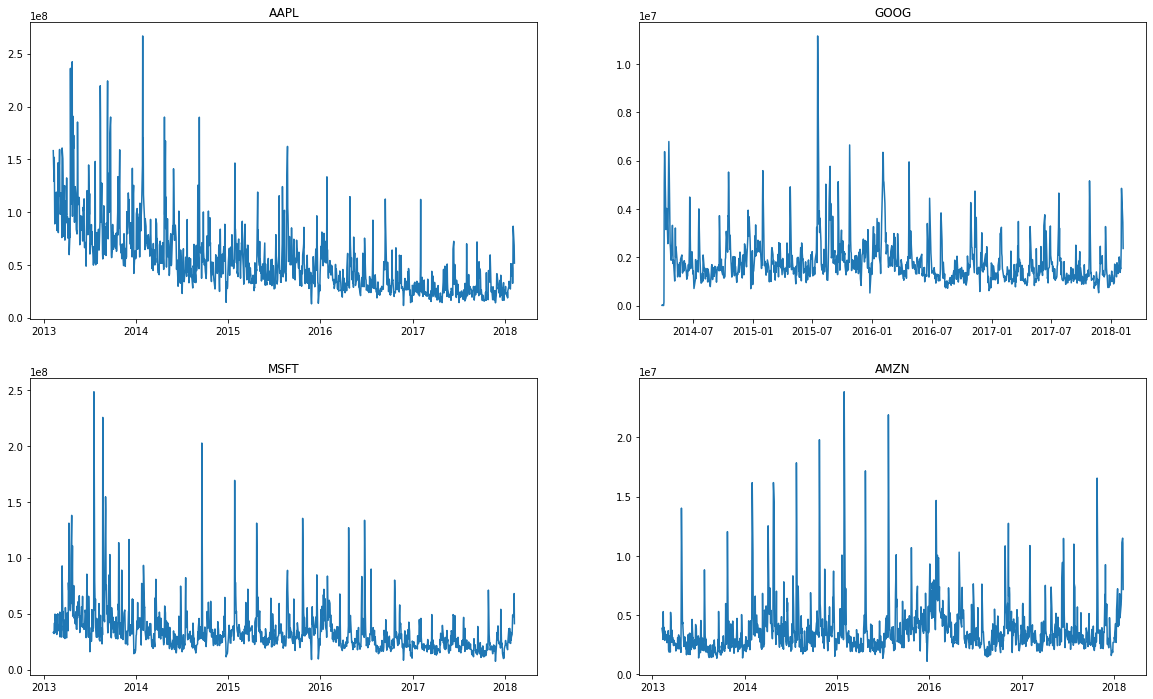

In [76]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


##### Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [130]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

##### daily return of the stock on average?

##### we can call this method shift either on dataframe or on time_series¶

##### its advantage in Financial Analysis is to calc % change in 1 day or price change in certain amount of day

In [199]:
df=pd.read_csv('F:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [205]:
df['Daily_Price_change']=df['close']-df['open']

In [206]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


##### percentage return

In [208]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [209]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'Daily_Price_change', '1day % return'],
      dtype='object')

##### using plotly to visualise data

In [210]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

##### using matplotlib

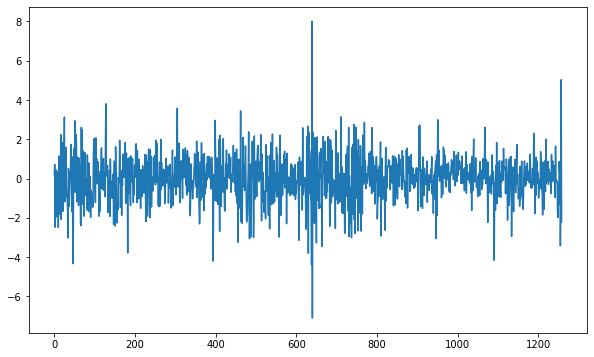

In [212]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

#### lets say between some interval

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text major ticklabel objects>)

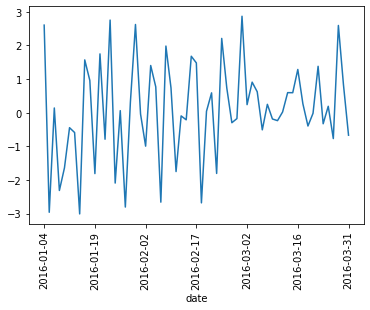

In [215]:
df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

#### Analyse monthly mean of close column

In [200]:
df2=df.copy()

In [190]:
df2['date']=pd.to_datetime(df2['date'])

In [191]:
df2.set_index('date',inplace=True)

In [192]:
df2.head()

,open,high,low,close,volume,Name,Prev_Day_Price,1 day price change,1day % return
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,67.8542,0.7072,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,68.5614,-1.7186,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,66.8428,-0.1272,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,66.7156,-0.0600,-0.089934


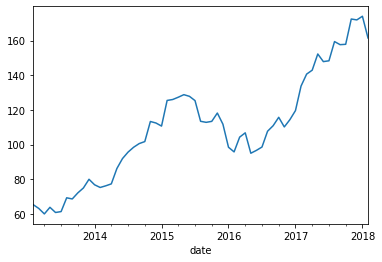

In [193]:
df2['close'].resample('M').mean().plot()

##### resampling close column year wise

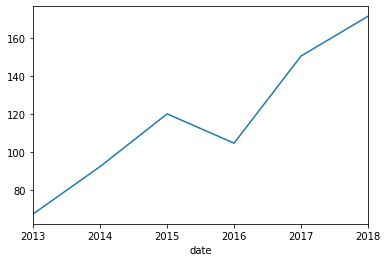

In [194]:
df2['close'].resample('Y').mean().plot()

##### Volume traded for Apple Stock

In [203]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [216]:
import plotly.express as px
fig = px.line(df, x="date", y="volume", title='Volume')
fig.show()

##### using matplotlib

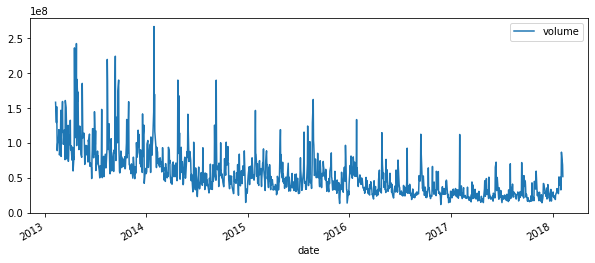

In [195]:
df2['volume'].plot(legend=True,figsize=(10,4))